In [ ]:
## importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [5]:
###fetching dataset

In [6]:
MSFT=pd.read_csv(r"C:\Users\ashut\OneDrive\Desktop\MSFT.csv")
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9671,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.920013,32687600
9672,2024-07-31,420.500000,421.779999,412.209991,418.350006,418.350006,42891400
9673,2024-08-01,420.790009,427.459991,413.089996,417.109985,417.109985,30296400
9674,2024-08-02,412.489990,415.000000,404.339996,408.489990,408.489990,29437900


In [7]:
## target data

df=MSFT[['Close']]


C:\Users\ashut\AppData\Local\Temp\ipykernel_3972\4243343653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = df2['Date'].apply(str_to_datetime)


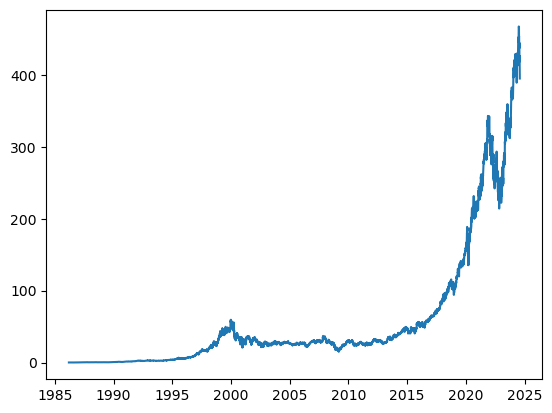

In [8]:
df2=MSFT[['Date','Close']]
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object
df2['Date'] = df2['Date'].apply(str_to_datetime)

df2.index = df2.pop('Date')
plt.plot(df2.index, df2['Close'])

#preprossoing

In [9]:
sclr=MinMaxScaler(feature_range=(0,1))
df=sclr.fit_transform(np.array(df).reshape(-1,1))


In [10]:
trn_siz=int(len(df)*0.70)
tst_siz = len(df)-trn_siz
train_data=df[0:trn_siz,:]
test_data=df[trn_siz:len(df):1]

In [11]:
trn_siz,tst_siz

(6773, 2903)

In [12]:
def crt_dataset(df, time_step=100):
    X, Y = [], []
    for i in range(len(df)-time_step-1):
        a = df[i:(i+time_step), 0]
        X.append(a)
        Y.append(df[i + time_step, 0])
    return np.array(X), np.array(Y)


X,Y=crt_dataset(df, time_step=100)
print("X:\n", X)
print("Y:\n", Y)

X:
 [[1.48544381e-05 2.22816571e-05 2.59974058e-05 ... 1.85680476e-05
  1.67112428e-05 1.67112428e-05]
 [2.22816571e-05 2.59974058e-05 2.04248523e-05 ... 1.67112428e-05
  1.67112428e-05 1.48544381e-05]
 [2.59974058e-05 2.04248523e-05 1.67112428e-05 ... 1.67112428e-05
  1.48544381e-05 1.29976333e-05]
 ...
 [8.75029375e-01 8.68782951e-01 8.65146326e-01 ... 9.09534228e-01
  9.12657472e-01 9.04507216e-01]
 [8.68782951e-01 8.65146326e-01 8.88163882e-01 ... 9.12657472e-01
  9.04507216e-01 8.94731167e-01]
 [8.65146326e-01 8.88163882e-01 8.87778845e-01 ... 9.04507216e-01
  8.94731167e-01 8.92078544e-01]]
Y:
 [1.48544381e-05 1.29976333e-05 1.11408285e-05 ... 8.94731167e-01
 8.92078544e-01 8.73638857e-01]


In [13]:
X.shape,Y.shape


((9575, 100), (9575,))

In [14]:

X_train, Y_train = X[:trn_siz], Y[:trn_siz]
X_test, Y_test = X[trn_siz:], Y[trn_siz:]

In [15]:
Y_train

array([1.48544381e-05, 1.29976333e-05, 1.11408285e-05, ...,
       7.46780390e-02, 7.40790719e-02, 7.33945377e-02])

In [16]:
Y_test

array([0.07467804, 0.07463526, 0.07380098, ..., 0.89473117, 0.89207854,
       0.87363886])

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\ashut\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=68, verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - loss: 3.9815e-04
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 9.7497e-06
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 9.1110e-06
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 8.9541e-06
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 7.0198e-06
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 6.8689e-06
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 5.9599e-06
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 6.5799e-06
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - loss: 5.3466e-06
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 5.5441e-06
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 5.6275e-06
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 4.5037e-06
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 4.5649e-06
Epoch 14/100
100/100 

In [20]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [21]:
# Transforming back to original scale
train_predict = sclr.inverse_transform(train_predict)
test_predict = sclr.inverse_transform(test_predict)

In [22]:
# Calculating RMSE
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 22.492343282022485
Test RMSE: 183.38968665447234
